In [1]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
from ProcesamientoCNN import argument_image, processImage

In [3]:
a=processImage('otros/1.jpeg',(150,220))

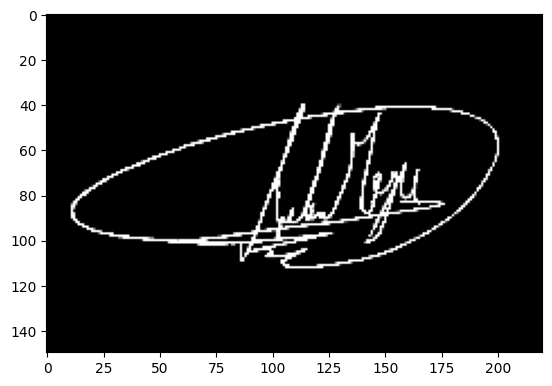

In [4]:
plt.imshow(a,'gray')

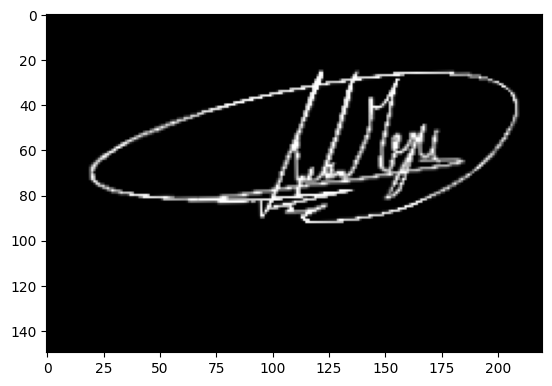

In [5]:
b=argument_image(a)
plt.imshow(b,'gray')

In [2]:
train_generator = extractorDataset("./data/", (150,220), 32)

In [3]:
a = next(train_generator)

In [13]:
len(a[1])

32

In [9]:
[i for i in a ]

[array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],


In [1]:
import os

In [17]:
subfolders=os.listdir("data")
random.shuffle(subfolders)

In [18]:
subfolders

['057',
 '063_forg',
 '067_forg',
 '056',
 '061',
 '064_forg',
 '053',
 '069_forg',
 '059',
 '068_forg',
 '064',
 '051_forg',
 '061_forg',
 '052',
 '065',
 '054',
 '049',
 '056_forg',
 '066_forg',
 '054_forg',
 '062_forg',
 '068',
 '063',
 '057_forg',
 '058_forg',
 '060_forg',
 '067',
 '058',
 '052_forg',
 '055_forg',
 '065_forg',
 '053_forg',
 '055',
 '060',
 '066',
 '051',
 '062',
 '059_forg',
 '050_forg',
 '069',
 '050',
 '049_forg']

In [2]:
from ProcesamientoCNN import processImage

In [75]:
def augment_image(image):
    # Rotación
    angle = random.uniform(-15, 15)  # Rotar en un rango de -15 a 15 grados
    M = cv2.getRotationMatrix2D((image.shape[1]//2, image.shape[0]//2), angle, 1)
    rotated = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

    # Desplazamiento
    tx = random.uniform(-10, 10)  # Desplazar en un rango de -10 a 10 píxeles en x
    ty = random.uniform(-10, 10)  # Desplazar en un rango de -10 a 10 píxeles en y
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    translated = cv2.warpAffine(rotated, M, (image.shape[1], image.shape[0]))

    # Recorte
    start_x = max(0, int((translated.shape[1] - image.shape[1]) / 2))
    start_y = max(0, int((translated.shape[0] - image.shape[0]) / 2))
    cropped = translated[start_y:start_y + image.shape[0], start_x:start_x + image.shape[1]]

    return cropped

In [7]:
a=processImage('1.jpeg',(150,220))

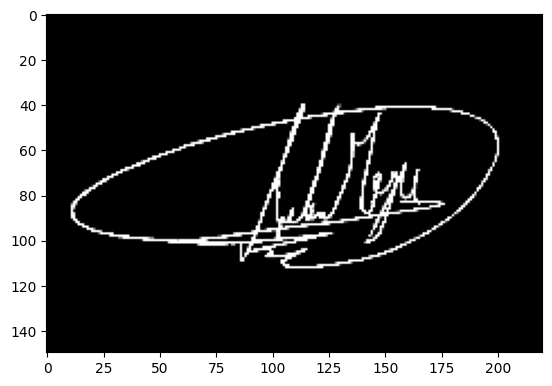

In [52]:
plt.imshow(a,'gray')

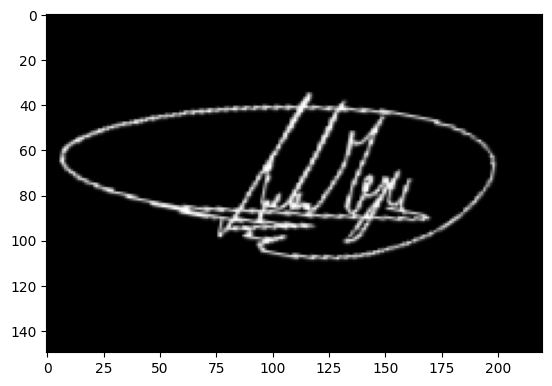

In [129]:
b=augment_image(a)
plt.imshow(b,'gray')

In [ ]:
import os
import random

def extractorDataset(folder, input_shape, batch_size):
    dataset = []
    intra_clase_real_count = 0
    inter_clase_real_falsificada_count = 0
    inter_clase_diferentes_personas_count = 0

    intra_clase_real_limit = int(batch_size * 0.35)+1
    inter_clase_real_falsificada_limit = int(batch_size * 0.45)+1
    inter_clase_diferentes_personas_limit = int(batch_size * 0.20)+1

    while True:
        subfolders = os.listdir(folder)
        random.shuffle(subfolders)

        for subfolder in subfolders:
            if "forg" not in subfolder:
                rutaSubfolderA = os.path.join(folder, subfolder)
                rutaSubfolderB = os.path.join(folder, f"{subfolder}_forg")

                imagenes = os.listdir(rutaSubfolderA)
                random.shuffle(imagenes)

                for imagen in imagenes:
                    imagenA = processImage(os.path.join(rutaSubfolderA, imagen), input_shape)

                    # Intra-clase Real                    
                    imagenesReales = os.listdir(rutaSubfolderA)
                    random.shuffle(imagenesReales)
                    for imagenReal in imagenesReales:
                        if imagenReal != imagen:
                            imagenB = processImage(os.path.join(rutaSubfolderA, imagenReal), input_shape)
                            dataset.append(([augment_image(imagenA), augment_image(imagenB)], 1))
                            intra_clase_real_count += 1
                            if intra_clase_real_count > intra_clase_real_limit:
                                break
                                

                    # Inter-clase Real-Falsificada                    
                    imagenesFalsas = os.listdir(rutaSubfolderB)
                    random.shuffle(imagenesFalsas)
                    for imagenFalsa in imagenesFalsas:
                        imagenB = processImage(os.path.join(rutaSubfolderB, imagenFalsa), input_shape)
                        dataset.append(([augment_image(imagenA), augment_image(imagenB)], 0))
                        inter_clase_real_falsificada_count += 1   
                        if inter_clase_real_falsificada_count > inter_clase_real_falsificada_limit:
                            break                         

                    # Inter-clase Diferentes Personas                    
                    subfoldersNegativas = os.listdir(folder)
                    random.shuffle(subfoldersNegativas)
                    for subfolderNegativas in subfoldersNegativas[:4]:
                        if subfolder not in subfolderNegativas:
                            imagenB = processImage(os.path.join(folder, subfolderNegativas, os.listdir(os.path.join(folder, subfolderNegativas))[0]), input_shape)
                            dataset.append(([augment_image(imagenA), augment_image(imagenB)], 0))
                            inter_clase_diferentes_personas_count += 1
                            if inter_clase_diferentes_personas_count > inter_clase_diferentes_personas_limit:
                                break
                               
                    
                    # Reset counts if batch is filled
                    if len(dataset) >= batch_size:
                        intra_clase_real_count = 0
                        inter_clase_real_falsificada_count = 0
                        inter_clase_diferentes_personas_count = 0
                        yield preparar_lote(dataset)
                        dataset = []

            
